# **OrdinaryLeastSquares_OLS**

https://www.xlstat.com/solutions/features/ordinary-least-squares-regression-ols </br>
https://www.geeksforgeeks.org/ordinary-least-squares-ols-using-statsmodels/ </br>
https://www.youtube.com/watch?v=RdvKNJzUWyo&ab_channel=SuperDataScience

# **The Ordinary Least Squares regression (OLS)** *is a common technique for estimating coefficients of linear regression equations which describe the relationship between one or more independent quantitative variables and a dependent variable (simple or multiple linear regression), often evaluated using r-squared. Least squares stand for the minimum squares error (SSE). Maximum likelihood and Generalised method of moments estimator are alternative approaches to OLS.*

Note: The OLS is widely used statistical method for estimating the parameters of a linear regression model. The OLS method aims to minimise the sum of square differences (residuals) between the observed and predicted values, considering potential issues of multicollinearity.

Assumptions of Ordinary Least Squares (OLS):
1) Individuals (observations) are independent. It is in general true in daily situations (the amount of rainfall does not depend on the previous day, the income does not depend on the previous month, the height of a person does not depend on the person measured just before…).
2) Variance is homogeneous.
3) Residuals follow a normal distribution.

In [1]:
#Import libraries / modules

import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Load the train dataset
data = pd.read_csv('train_OLS.csv')

# x: Independent variable (predictor).
# y: Dependent variable (response).

x = data['x'].tolist()
y = data['y'].tolist()

In [8]:
# Add a Constant Term
# In linear regression the equation includes an intercept term (b0​). To include this term in the model we use the add_constant() function from statsmodels.

x = sm.add_constant(x)

In [9]:
# Perform OLS Regression
#Fit the OLS regression model using the OLS() function.
#This function takes the dependent variable (y) and the independent variable (x) as inputs.

result = sm.OLS(y, x).fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 2.709e+04
Date:                Thu, 22 May 2025   Prob (F-statistic):          1.33e-294
Time:                        18:20:50   Log-Likelihood:                -757.98
No. Observations:                 300   AIC:                             1520.
Df Residuals:                     298   BIC:                             1527.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4618      0.360     -1.284      0.2

*Interpretation*

*   The output shows that the regression model fits the data very well with an R-squared of 0.989.
*   The independent variable x1 is highly significant (p < 0.001) and has a strong positive effect on the target variable.
*   The intercept (const) is not statistically significant (p = 0.200) meaning it may not contribute meaningfully.
*   Residuals are normally distributed as indicated by the Omnibus and Jarque-Bera test p-values (> 0.05).
*   The Durbin-Watson value is ~2 indicating no autocorrelation in residuals.
*   The overall model is statistically significant with a very high F-statistic and a near-zero p-value.


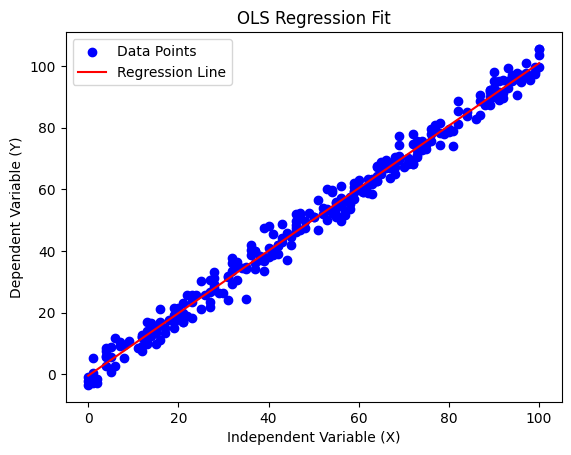

In [10]:
# Visualise the Regression Line

plt.scatter(data['x'], data['y'], color='blue', label='Data Points')

x_range = np.linspace(data['x'].min(), data['x'].max(), 100)
y_pred = result.params[0] + result.params[1] * x_range

plt.plot(x_range, y_pred, color='red', label='Regression Line')
plt.xlabel('Independent Variable (X)')
plt.ylabel('Dependent Variable (Y)')
plt.title('OLS Regression Fit')
plt.legend()
plt.show()

The above plot shows a strong linear relationship between the independent variable (X) and the dependent variable (Y). Blue dots represent the actual data points which are closely aligned with the red regression line indicating a good model fit.